11490434/11490434 [==============================] - 0s 0us/step
Training dataset is: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Training labels are: 
 [5 0 4 ... 5 6 8] 


Testing dataset is: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0

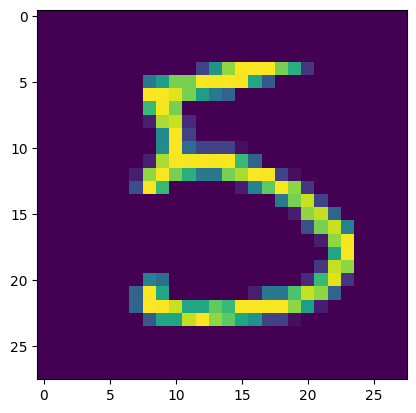

1/1 [==============================] - 0s 23ms/step
Predictions given by the model is: 
 [[9.75560914e-14 1.07823105e-07 1.50268751e-12 2.32353086e-05
  3.13414052e-12 9.99969840e-01 2.66914357e-09 1.89127766e-16
  6.81330130e-06 4.07056167e-10]]


In [1]:

#Loading the necessary libraries
import keras
from keras.datasets import mnist
import numpy as np

#Loading the MNIST digit classification dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#Anlayzing the MNIST dataset
print("Training dataset is: \n", x_train)
print("Training labels are: \n", y_train, "\n\n")
print("Testing dataset is: \n", x_test)
print("Testing labels are: \n", y_test, "\n\n")

print("Shape of training dataset is: ", np.shape(x_train), "\n")
print("Shape  of testing dataset is: ", np.shape(x_test))

#Reshaping the training and testing dataset: converting image matrix (28x28) into image feature vector (784,)

x,y,z = np.shape(x_train)
x_train = np.reshape(x_train,(x,y*z))
print("Modified shape of the training dataset is: ", np.shape(x_train))

x,y,z = np.shape(x_test)
x_test = np.reshape(x_test,(x,y*z))
print("Modified shape of the testing dataset is: ", np.shape(x_test))

#Converting training labels into one-hot vectors
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
print("One-Hot training labels are: \n", y_train)
print("Shape of One-Hot training labels are: \n", np.shape(y_train))

#Converting testing labels into one-hot vectors
y_test = to_categorical(y_test, num_classes=10)
print("One-Hot testing labels are: \n", y_test)
print("Shape of One-Hot testing labels are: \n", np.shape(y_test))

#Building the Neural Network Model
from keras.models import Sequential
from keras.layers import Dense

ann_model = Sequential()

#Adding layers to the Neural Network Model

input_layer= ann_model.add(Dense(392, input_shape=((784,)), activation ='relu'))

hidden_layer1 = ann_model.add(Dense(196,activation='relu'))
hidden_layer2 = ann_model.add(Dense(99 ,activation='linear'))
hidden_layer3 = ann_model.add(Dense(196,activation='relu'))
hidden_layer4 = ann_model.add(Dense(392,activation='linear'))

#This last softmax layer is  important
output_layer = ann_model.add(Dense(10, activation='softmax'))

#Getting the model summary information
print(ann_model.summary())

#Compiling the Neural Network
ann_model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['acc'])

#Training the Neural Network
ann_model.fit(x_train, y_train, batch_size=1024, epochs=10, verbose=1,shuffle=True)

#Getting the loss and accuracy of the model on the test dataset
loss, accuracy = ann_model.evaluate(x_test,y_test)

print("\nLoss = ", loss, "\n")
print("Accuracy = ", accuracy, "\n")

#Making predictions on the testing dataset
ann_predictions = ann_model.predict(x_test)
print("Predictions from Neural Network are: \n", ann_predictions, "\n")
print("Shape of the above predictions is: ", np.shape(ann_predictions),"\n")

#Making predictions on individual test point

test_point = x_test[15]
test_point = np.reshape(test_point,(1,784))
print("Shape of the test point is: ", np.shape(test_point), "\n")
test_image = np.reshape(x_test[15],(28,28))
print("Shape of test image is: ", np.shape(test_image), "\n")

#Displaying the test point so that we know its ground-truth
from matplotlib import pyplot as plt
plt.imshow(test_image, interpolation='nearest')
plt.show()

#Making predictions on the test data point
prediction = ann_model.predict(test_point)
print("Predictions given by the model is: \n", prediction)